# Twitter Sentiment Analysis for Milk Prices

# Business Goal
The goal of this project is to extract all tweets from Twitter containing the keyword "Milk Prices" and understand if the sentiment of the tweet falls under positive, negative or neutral category

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "dlmSwyiJRNgL5a5y7tD0Zjxgr"
consumerSecret = "tMxnFrRs1088cqIjlDnaG4RUT9xs1AXd3Mpwvv3TNaUxUsnx0D"
accessToken = "1518310189962780672-fpocSf7XDjjl3LctVad2pCDEXnoF0a"
accessTokenSecret = "GWYlpl3UuYg4TQ003BeL3FIqpDsV9jptyPRenF0PuGGr2"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: milk prices
Please enter how many tweets to analyze: 500000


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1503
positive number:  785
negative number:  321
neutral number:  397


In [5]:
tweet_list

,0
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...
1,@chicagotribune A gallon of milk is a lot more...
2,#Breaking | Prices of milk to rise in #Goa fro...
3,@ledamalekina Are you serious???\nThe govt u ...
4,@NOBODY42079029 Wow! Prices have increased in ...
...,...
1498,RT @Abhi_singhi: Milk - 39.7% ⬆️\nWheat - 27.1...
1499,RT @BeckettUnite: Fresh fruit import costs up ...
1500,RT @BeckettUnite: Fresh fruit import costs up ...
1501,RT @BeckettUnite: Fresh fruit import costs up ...


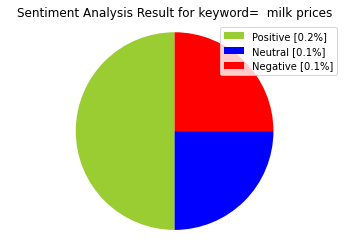

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
#Remove the duplicate values in the tweet
tweet_list.drop_duplicates(inplace = True)

# Extracting the text values from the tweet

In [9]:
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values 
text_positive = positive_list[0].values 
text_negative = negative_list[0].values

In [10]:
#copy the tweet_list to tw_list dataframe
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...,@jeromeusa @hfjdj655j @milleridriss @CharliDon...
1,@chicagotribune A gallon of milk is a lot more...,@chicagotribune A gallon of milk is a lot more...
2,#Breaking | Prices of milk to rise in #Goa fro...,#Breaking | Prices of milk to rise in #Goa fro...
3,@ledamalekina Are you serious???\nThe govt u ...,@ledamalekina Are you serious???\nThe govt u ...
4,@NOBODY42079029 Wow! Prices have increased in ...,@NOBODY42079029 Wow! Prices have increased in ...
...,...,...
1438,Milk production in Kenya is heavily dependent ...,Milk production in Kenya is heavily dependent ...
1457,Assistant Commissioner (Secretariat) visited d...,Assistant Commissioner (Secretariat) visited d...
1460,Results will be another gas shortage until pri...,Results will be another gas shortage until pri...
1462,@Jamz5251 Results will be another gas shortage...,@Jamz5251 Results will be another gas shortage...


In [11]:
tweet_list

,0,text
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...,@jeromeusa @hfjdj655j @milleridriss @CharliDon...
1,@chicagotribune A gallon of milk is a lot more...,@chicagotribune A gallon of milk is a lot more...
2,#Breaking | Prices of milk to rise in #Goa fro...,#Breaking | Prices of milk to rise in #Goa fro...
3,@ledamalekina Are you serious???\nThe govt u ...,@ledamalekina Are you serious???\nThe govt u ...
4,@NOBODY42079029 Wow! Prices have increased in ...,@NOBODY42079029 Wow! Prices have increased in ...
...,...,...
1438,Milk production in Kenya is heavily dependent ...,Milk production in Kenya is heavily dependent ...
1457,Assistant Commissioner (Secretariat) visited d...,Assistant Commissioner (Secretariat) visited d...
1460,Results will be another gas shortage until pri...,Results will be another gas shortage until pri...
1462,@Jamz5251 Results will be another gas shortage...,@Jamz5251 Results will be another gas shortage...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...,this isn t like bitching about buying ...
1,@chicagotribune A gallon of milk is a lot more...,a gallon of milk is a lot more important to ...
2,#Breaking | Prices of milk to rise in #Goa fro...,breaking prices of milk to rise in goa fro...
3,@ledamalekina Are you serious???\nThe govt u ...,are you serious the govt u support of uk...
4,@NOBODY42079029 Wow! Prices have increased in ...,wow prices have increased in places meat m...
5,RT @profstonge: Food prices received by farmer...,food prices received by farmers up 31 year o...
6,RT @dtheavenger: @AnaCabrera @NuclearVet Now s...,now say how this is bad for biden and tal...
7,Check out how NI processors compare on prices ...,check out how ni processors compare on prices ...
8,RT @Diceawaii: Here’s the second half of the F...,here s the second half of the froeg dice an...
9,Gasoline over $4.10 again. Food prices nuts. ...,gasoline over 4 10 again food prices nuts ...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...,this isn t like bitching about buying ...,0.200000,0.400000,positive,0.154,0.662,0.184,0.1027
1,@chicagotribune A gallon of milk is a lot more...,a gallon of milk is a lot more important to ...,0.450000,0.750000,positive,0.000,0.870,0.130,0.2716
2,#Breaking | Prices of milk to rise in #Goa fro...,breaking prices of milk to rise in goa fro...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,@ledamalekina Are you serious???\nThe govt u ...,are you serious the govt u support of uk...,0.033333,0.683333,positive,0.072,0.778,0.150,0.3400
4,@NOBODY42079029 Wow! Prices have increased in ...,wow prices have increased in places meat m...,-0.100000,0.700000,positive,0.000,0.802,0.198,0.4497
5,RT @profstonge: Food prices received by farmer...,food prices received by farmers up 31 year o...,0.500000,0.888889,positive,0.000,0.888,0.112,0.4404
6,RT @dtheavenger: @AnaCabrera @NuclearVet Now s...,now say how this is bad for biden and tal...,-0.700000,0.666667,negative,0.226,0.774,0.000,-0.5423
7,Check out how NI processors compare on prices ...,check out how ni processors compare on prices ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @Diceawaii: Here’s the second half of the F...,here s the second half of the froeg dice an...,0.144444,0.372222,neutral,0.000,1.000,0.000,0.0000
9,Gasoline over $4.10 again. Food prices nuts. ...,gasoline over 4 10 again food prices nuts ...,-0.166667,0.166667,negative,0.108,0.892,0.000,-0.3182


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,274,38.70
neutral,256,36.16
negative,178,25.14


In [20]:
#move the sentiment values into a pc dataframe
pc = count_values_in_column(tw_list,"sentiment")

In [21]:
#display the first 5 records of pc
pc.head()

,Total,Percentage
positive,274,38.70
neutral,256,36.16
negative,178,25.14


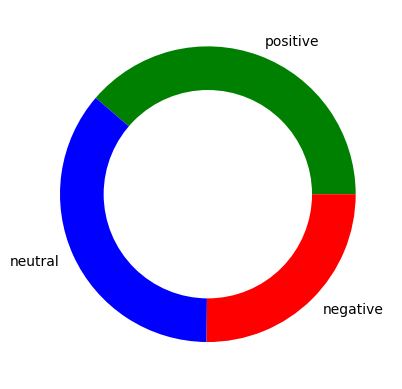

In [22]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [25]:
#display the tweet dataframe
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@jeromeusa @hfjdj655j @milleridriss @CharliDon...,this isn t like bitching about buying ...,0.200000,0.400000,positive,0.154,0.662,0.184,0.1027
1,@chicagotribune A gallon of milk is a lot more...,a gallon of milk is a lot more important to ...,0.450000,0.750000,positive,0.000,0.870,0.130,0.2716
2,#Breaking | Prices of milk to rise in #Goa fro...,breaking prices of milk to rise in goa fro...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,@ledamalekina Are you serious???\nThe govt u ...,are you serious the govt u support of uk...,0.033333,0.683333,positive,0.072,0.778,0.150,0.3400
4,@NOBODY42079029 Wow! Prices have increased in ...,wow prices have increased in places meat m...,-0.100000,0.700000,positive,0.000,0.802,0.198,0.4497


In [27]:
#disp;ay the shape of tweet dataframe
tw_list.shape

(708, 9)

# Data Pre Processing

In [28]:
# Store the column of the dataframe named as "text"
X = tw_list['text']

# Display the value "X"
print(X)

0               this isn t like bitching about buying ...
1         a gallon of milk is a lot more important to ...
2        breaking   prices of milk to rise in  goa fro...
3         are you serious    the govt  u support of uk...
4         wow  prices have increased in places  meat m...
                              ...                        
1438    milk production in kenya is heavily dependent ...
1457    assistant commissioner  secretariat  visited d...
1460    results will be another gas shortage until pri...
1462      results will be another gas shortage until p...
1479    in times of high production costs and fluctuat...
Name: text, Length: 708, dtype: object


In [29]:
# Store the column of the dataframe named as  "sentiment"
y = tw_list['sentiment']

# Display the column of the dataframe named as "sentiment"
print(y)

0       positive
1       positive
2        neutral
3       positive
4       positive
          ...   
1438     neutral
1457     neutral
1460    positive
1462    positive
1479    positive
Name: sentiment, Length: 708, dtype: object


# Clean Your Text Data

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [32]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [33]:
# Display the cleaned_data
cleaned_data

['like bitch buy milk whole food pric',
 'gallon milk lot import household gallon ga',
 'break price milk rise goa monday',
 'seriou govt u support uk jamaa wa handshak import cheap fertil',
 'wow price increas place meat milk egg increas store slow rise',
 'food price receiv farmer year year milk veggi poultri egg sure tr',
 'say bad biden talk milk price',
 'check ni processor compar price paid litr produc march milk',
 'second half froeg dice ink price info preorder ink royal gold rose go',
 'gasolin food price nut siggi yogurt cost half price quart milk buy che',
 'beyond understand milk price set oil price free market',
 'alcohol get pricey least milk price come good rain milk produc zone expect',
 'fresh fruit import cost sinc start year wholesal cost homegrown potato wheat',
 'hello beauti peopl week wholesal price lb melt pour base list may broken int',
 'fed got loan fafsa colleg jump glee free money use',
 'game make slower reveal usual reach end thing pick dra',
 'c freeship

In [34]:
print(y)

0       positive
1       positive
2        neutral
3       positive
4       positive
          ...   
1438     neutral
1457     neutral
1460    positive
1462    positive
1479    positive
Name: sentiment, Length: 708, dtype: object


In [35]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['negative', 'neutral', 'positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [36]:
y.head()

0    2
1    2
2    1
3    2
4    2
Name: sentiment, dtype: int64

# Bag of Words using CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000, stop_words = ['milk price', 'consumer', 'producer'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['milk', 'price'] not in stop_words.
  warnings.warn(


(708, 1986)

In [38]:
X_fin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [40]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [41]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [42]:
# Call predict() method
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        52
           1       0.70      0.65      0.67        79
           2       0.62      0.73      0.67        82

    accuracy                           0.64       213
   macro avg       0.64      0.63      0.63       213
weighted avg       0.64      0.64      0.64       213



# Feature Generation using TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000, stop_words = ['milk price', 'consumer', 'producer'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['milk', 'price'] not in stop_words.
  warnings.warn(


In [45]:
X_tfidf 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [47]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [48]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [49]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.76      0.40      0.52        48
           1       0.71      0.61      0.66        82
           2       0.60      0.86      0.71        83

    accuracy                           0.66       213
   macro avg       0.69      0.62      0.63       213
weighted avg       0.68      0.66      0.65       213



# Reference:
https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040
Sample code reference-https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb